# Interactions - Lab

## Introduction

In this lab, you'll explore interactions in the Ames Housing dataset.

## Objectives

You will be able to:
- Implement interaction terms in Python using the `sklearn` and `statsmodels` packages 
- Interpret interaction variables in the context of a real-world problem 

## Build a baseline model 

You'll use a couple of built-in functions, which we imported for you below: 

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

If you still want to build a model in the end, you can do that, but this lab will just focus on finding meaningful insights in interactions and how they can improve $R^2$ values.

In [2]:
regression = LinearRegression()

Create a baseline model which includes all the variables we selected from the Ames housing data set to predict the house prices. Then use 10-fold cross-validation and report the mean $R^2$ value as the baseline $R^2$.

In [3]:
ames = pd.read_csv('ames.csv')

continuous = ['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']

## code here

ames_cont = ames[continuous]

# log features
log_names = [f'{column}_log' for column in ames_cont.columns]

ames_log = np.log(ames_cont)
ames_log.columns = log_names

# normalize

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

ames_log_norm = ames_log.apply(normalize)

# one hot encode categoricals
ames_ohe = pd.get_dummies(ames[categoricals], prefix=categoricals, drop_first=True)

preprocessed = pd.concat([ames_log_norm, ames_ohe], axis=1)

X = preprocessed.drop('SalePrice_log', axis=1)
y = preprocessed['SalePrice_log']

In [4]:
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=7)
cv_10_results  = cross_val_score(regression, X, y, cv=crossvalidation,  scoring='r2')
baseline = np.mean(cv_10_results)

In [5]:
print(f'Baseline R-squared: {baseline}')

Baseline R-squared: 0.8182709691573022


In [6]:
import statsmodels.api as sm
df_inter_sm = sm.add_constant(X)
model = sm.OLS(y, df_inter_sm)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SalePrice_log   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     156.5
Date:                Thu, 06 May 2021   Prob (F-statistic):               0.00
Time:                        12:11:20   Log-Likelihood:                -738.14
No. Observations:                1460   AIC:                             1572.
Df Residuals:                    1412   BIC:                             1826.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1317      0.263     -0.500      0.617      -0.648       0.385
LotArea_log              0.1033      0.019      5.475      0.000       0.066       0.140
1stFlrSF_log             0.1371      0.016      8.584      0.000       0.106       0.168
GrLivArea_log            0.3768      0.016     24.114      0.000       0.346       0.407
BldgType_2fmCon         -0.1715      0.079     -2.173      0.030      -0.326      -0.017
BldgType_Duplex         -0.4203      0.062     -6.813      0.000      -0.541      -0.299
BldgType_Twnhs          -0.1403      0.093     -1.513      0.130      -0.322       0.042
BldgType_TwnhsE         -0.0512      0.060     -0.858      0.391      -0.168       0.066
KitchenQual_Fa          -0.9999      0.088    -11.315      0.000      -1.173      -0.827
KitchenQual_Gd          -0.3820      0.050     -7.613      0.000      -0.480      -0.284
KitchenQual_TA          -0.6692      0.055    -12.111      0.000      -0.778      -0.561
SaleType_CWD             0.2285      0.215      1.061      0.289      -0.194       0.651
SaleType_Con             0.5861      0.304      1.927      0.054      -0.010       1.183
SaleType_ConLD           0.3151      0.155      2.029      0.043       0.010       0.620
SaleType_ConLI           0.0331      0.195      0.169      0.865      -0.350       0.416
SaleType_ConLw           0.0161      0.196      0.082      0.935      -0.368       0.400
SaleType_New             0.2999      0.079      3.803      0.000       0.145       0.455
SaleType_Oth             0.1178      0.245      0.480      0.631      -0.364       0.599
SaleType_WD              0.1748      0.065      2.676      0.008       0.047       0.303
MSZoning_FV              1.0666      0.193      5.526      0.000       0.688       1.445
MSZoning_RH              0.8768      0.194      4.512      0.000       0.496       1.258
MSZoning_RL              0.9961      0.162      6.151      0.000       0.678       1.314
MSZoning_RM              1.1023      0.152      7.264      0.000       0.805       1.400
Street_Pave             -0.2131      0.180     -1.182      0.237      -0.567       0.141
Neighborhood_Blueste     0.0529      0.318      0.167      0.868      -0.571       0.677
Neighborhood_BrDale     -0.4627      0.171     -2.711      0.007      -0.798      -0.128
Neighborhood_BrkSide    -0.6498      0.137     -4.735      0.000      -0.919      -0.381
Neighborhood_ClearCr    -0.2102      0.144     -1.456      0.146      -0.493       0.073
Neighborhood_CollgCr    -0.0761      0.119     -0.641      0.522      -0.309       0.157
Neighborhood_Crawfor    -0.0823      0.129     -0.638      0.523      -0.335       0.171
Neighborhood_Edwards    -0.7613      0.124     -6.143      0.000      -1.004      -0.518
Neighborhood_Gilbert    -0.0980      0.126     -0.777    

## See how interactions improve your baseline

Next, create all possible combinations of interactions, loop over them and add them to the baseline model one by one to see how they affect the $R^2$. We'll look at the 3 interactions which have the biggest effect on our $R^2$, so print out the top 3 combinations.

You will create a `for` loop to loop through all the combinations of 2 predictors. You can use `combinations` from itertools to create a list of all the pairwise combinations. To find more info on how this is done, have a look [here](https://docs.python.org/2/library/itertools.html).

Since there are so many different neighbourhoods we will exclude

In [7]:
from itertools import combinations
all_cats = X.columns
combos = list(combinations(all_cats, 2))

In [8]:
# code to find top interactions by R^2 value here
r_squareds = []

for i, combo in enumerate(combos):
    temp = X.copy()
    temp['interact'] = temp[combo[0]] * temp[combo[1]]
    mean_score = np.mean(cross_val_score(regression, temp, y, scoring='r2', cv=crossvalidation))
    if mean_score > baseline:
        r_squareds.append((mean_score, combo))
    if i % 50 == 0:
        print(i)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050


In [9]:
sorted(r_squareds)[-3:]

[(0.8205425097425973, ('GrLivArea_log', 'KitchenQual_TA')),
 (0.8206692376645167, ('1stFlrSF_log', 'BldgType_Duplex')),
 (0.8214558206926412, ('GrLivArea_log', 'BldgType_Duplex'))]

It looks like the top interactions involve the Neighborhood_Edwards feature so lets add the interaction between LotArea and Edwards to our model.

We can interpret this feature as the relationship between LotArea and SalePrice when the house is in Edwards or not.

## Visualize the Interaction

Separate all houses that are located in Edwards and those that are not. Run a linear regression on each population against `SalePrice`. Visualize the regression line and data points with price on the y axis and LotArea on the x axis.

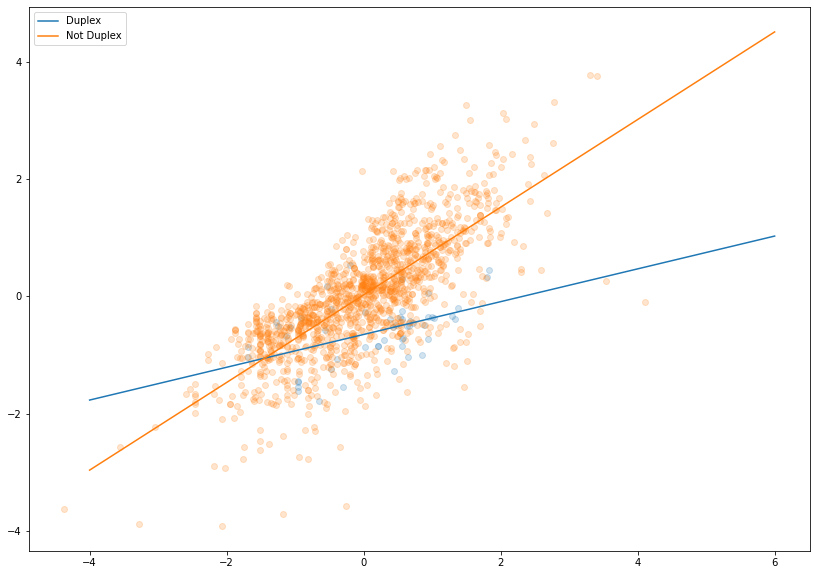

In [14]:
# Visualization code here

df_in = preprocessed[preprocessed['BldgType_Duplex'] == 1]
in_lot = df_in[['GrLivArea_log']]
in_price = df_in['SalePrice_log']

df_out = preprocessed[preprocessed['BldgType_Duplex'] == 0]
out_lot = df_out[['GrLivArea_log']]
out_price = df_out['SalePrice_log']

fig, ax = plt.subplots(figsize=(14,10))

x = np.linspace(-4, 6).reshape(-1, 1)

linreg = LinearRegression()
linreg.fit(in_lot, in_price)
preds = linreg.predict(x)

ax.plot(x, preds, label='Duplex')
ax.scatter(in_lot, in_price, alpha=.2)

linreg = LinearRegression()
linreg.fit(out_lot, out_price)
preds = linreg.predict(x)

ax.plot(x, preds, label='Not Duplex')
ax.scatter(out_lot, out_price, alpha=.2)

ax.legend();

## Build a final model with interactions

Use 10-fold cross-validation to build a model using the above interaction. 

In [15]:
# code here
X_fin = X.copy()
X_fin['GrLivArea*Duplex'] = X['GrLivArea_log'] * X['BldgType_Duplex']

mean_score = np.mean(cross_val_score(regression, X_fin, y, scoring='r2', cv=crossvalidation))
mean_score

0.8214558206926412

Our $R^2$ has increased considerably! Let's have a look in `statsmodels` to see if this interactions are significant.

In [16]:
# code here

df_inter_sm = sm.add_constant(X_fin)
model = sm.OLS(y, df_inter_sm)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SalePrice_log   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     155.2
Date:                Thu, 06 May 2021   Prob (F-statistic):               0.00
Time:                        12:15:51   Log-Likelihood:                -729.74
No. Observations:                1460   AIC:                             1557.
Df Residuals:                    1411   BIC:                             1816.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2589      0.264     -0.982      0.326      -0.776       0.258
LotArea_log              0.1037      0.019      5.528      0.000       0.067       0.141
1stFlrSF_log             0.1362      0.016      8.569      0.000       0.105       0.167
GrLivArea_log            0.3879      0.016     24.579      0.000       0.357       0.419
BldgType_2fmCon         -0.1709      0.078     -2.177      0.030      -0.325      -0.017
BldgType_Duplex         -0.3838      0.062     -6.187      0.000      -0.505      -0.262
BldgType_Twnhs          -0.1359      0.092     -1.473      0.141      -0.317       0.045
BldgType_TwnhsE         -0.0471      0.059     -0.793      0.428      -0.163       0.069
KitchenQual_Fa          -0.9888      0.088    -11.245      0.000      -1.161      -0.816
KitchenQual_Gd          -0.3774      0.050     -7.559      0.000      -0.475      -0.279
KitchenQual_TA          -0.6582      0.055    -11.962      0.000      -0.766      -0.550
SaleType_CWD             0.2142      0.214      1.000      0.317      -0.206       0.634
SaleType_Con             0.5743      0.302      1.898      0.058      -0.019       1.168
SaleType_ConLD           0.3204      0.154      2.074      0.038       0.017       0.623
SaleType_ConLI           0.0449      0.194      0.231      0.817      -0.336       0.426
SaleType_ConLw           0.0096      0.195      0.049      0.961      -0.372       0.392
SaleType_New             0.2896      0.078      3.691      0.000       0.136       0.444
SaleType_Oth             0.1029      0.244      0.422      0.673      -0.376       0.582
SaleType_WD              0.1654      0.065      2.544      0.011       0.038       0.293
MSZoning_FV              1.0188      0.192      5.297      0.000       0.641       1.396
MSZoning_RH              0.8770      0.193      4.537      0.000       0.498       1.256
MSZoning_RL              0.9494      0.161      5.879      0.000       0.633       1.266
MSZoning_RM              1.0624      0.151      7.025      0.000       0.766       1.359
Street_Pave             -0.0363      0.185     -0.197      0.844      -0.398       0.326
Neighborhood_Blueste     0.0336      0.316      0.106      0.915      -0.587       0.654
Neighborhood_BrDale     -0.4720      0.170     -2.780      0.006      -0.805      -0.139
Neighborhood_BrkSide    -0.6497      0.136     -4.760      0.000      -0.917      -0.382
Neighborhood_ClearCr    -0.2183      0.144     -1.520      0.129      -0.500       0.063
Neighborhood_CollgCr    -0.0755      0.118     -0.640      0.523      -0.307       0.156
Neighborhood_Crawfor    -0.0828      0.128     -0.645      0.519      -0.335       0.169
Neighborhood_Edwards    -0.7701      0.123     -6.247      0.000      -1.012      -0.528
Neighborhood_Gilbert    -0.1036      0.125     -0.826    

What is your conclusion here?

In [17]:
# formulate your conclusion

# With both 10-fold cross-validation and the Statsmodels formulation, the R-squared value only increased
# by ~ 0.002 (0.2%) which is nice, but not very significant.

# On a meta level, after looking at the solution, I think there are some weird omissions/oversights
# that led them to have a lower baseline initially (the biggest, is not using the log/norm continuous values)
# such that they ended up with an apparently bigger improvement in R-squared.

# As well, after checking different random_state's in the initial crossvalidation instantiation,
# the differences in R^2 among the different combinations are so small that I found different top interactions
# every time when running different random_states. In this version saved here, it was between GrLivArea and Duplex.
# But whichever interaction I chose, the top one seemed to always be in that same range (improvement of ~0.002)

## Summary

You should now understand how to include interaction effects in your model! As you can see, interactions can have a strong impact on linear regression models, and they should always be considered when you are constructing your models.